In [46]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
# Load the dataset
Data = 'sample-superstore-subset-excel.xlsx'
df = pd.read_excel(Data)

# Display the first few rows and summary statistics
orders.head(), orders.describe()


(   Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
 0   18606  Not Specified      0.01        2.88           0.50            2   
 1   20847           High      0.01        2.84           0.93            3   
 2   23086  Not Specified      0.03        6.68           6.15            3   
 3   23087  Not Specified      0.01        5.68           3.60            3   
 4   23088  Not Specified      0.00      205.99           2.50            3   
 
      Customer Name    Ship Mode Customer Segment Product Category  ...  \
 0  Janice Fletcher  Regular Air        Corporate  Office Supplies  ...   
 1    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
 2    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
 3    Bonnie Potter  Regular Air        Corporate  Office Supplies  ...   
 4    Bonnie Potter  Express Air        Corporate       Technology  ...   
 
         City Postal Code Order Date  Ship Date    Profit Quantity order

In [48]:
# Handle missing values


# Convert data types if necessary


# Create any new columns needed for analysis

In [59]:
# Univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = df.select_dtypes(include=['object']).columns

# Plot frequency counts for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

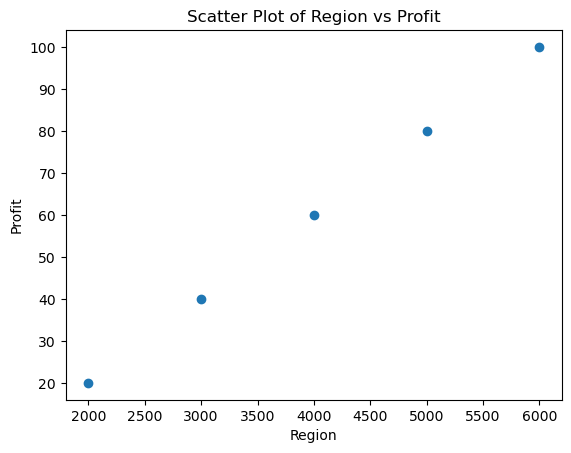

In [58]:
# Bivariate analysis
(df.columns)
import pandas as pd
import matplotlib.pyplot as plt
data = {'Region': [2000,3000,4000,5000,6000],
    'Profit': [20,40,60,80,100]}
df = pd.DataFrame(data)
plt.scatter(df['Region'], df['Profit'])
plt.xlabel('Region')
plt.ylabel('Profit')
plt.title('Scatter Plot of Region vs Profit')
plt.show()

In [54]:

# Summary statistics for key variables
Orders[['Sales', 'Profit', 'Quantity ordered new', 'Profit Margin', 'Delivery Time']].describe()


NameError: name 'Orders' is not defined

In [60]:
# Grouped statistics
group_st = orders.groupby('Region')[['Sales', 'Profit']].describe()
group_st

Sales                                                             \
          count         mean          std   min     25%      50%       75%   
Region                                                                       
Central  2878.0   866.491591  2035.630454  2.24  59.310  200.055  762.1425   
East     2269.0  1042.901657  2793.734542  1.32  62.810  220.660  808.4400   
South    1940.0   808.547603  2170.859991  2.66  57.900  176.695  630.0675   
West     2267.0  1041.406409  3266.845431  1.62  62.535  200.680  857.8300   

                    Profit                                                  \
               max   count        mean          std         min        25%   
Region                                                                       
Central   32589.59  2878.0  177.739563   912.513132 -13706.4640  -57.96575   
East      48418.58  2269.0  162.642110   884.606934  -4017.6165  -68.04600   
South     40136.93  1940.0   51.712562  1060.828705 -16476.8380 -117.55800   
West     100119.16  2267.0  132.156623  1117.484937 -14140.7016  -64.39500   

                                         
            50%         75%         max  
Region                                   
Central  5.9984  171.263675  12504.9045  
East     2.0000  126.225000   9228.2256  
South   -3.1780  104.692500  16332.4140  
West     2.0900  142.628400   8917.7187


### Conclusion

- Summary of key findings.
- Insights based on the analysis.


## Additional Statistical Analysis


In [8]:

from scipy.stats import ttest_ind, chi2_contingency

# Example: T-test for sales in different regions
central_sales = orders[orders['Region'] == 'Central']['Sales']
west_sales = orders[orders['Region'] == 'West']['Sales']

t_stat, p_val = ttest_ind(central_sales, west_sales)
t_stat, p_val



# Example: Chi-square test for independence between Ship Mode and Customer Segment

contingency_table = pd.crosstab(orders['Ship Mode'], orders['Customer Segment'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
chi2_stat, p_val


(1.1506462403472757, 0.9792522476281447)

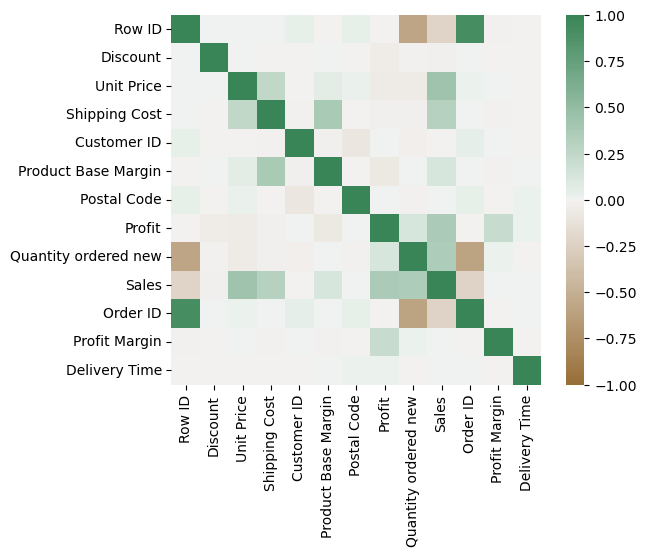

In [14]:
# Selecting only numeric columns for correlation matrix

numeric_columns = orders.select_dtypes(include=[np.number])

# Calculating the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
correlation_matrix

axis_corr = sns.heatmap(
correlation_matrix,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

In [26]:

import statsmodels.api as sm

Sales_prediction = pd.read_excel('sample-superstore-subset-excel.xlsx', header=0)

x = Sales_prediction['Discount', 'Unit_Price', 'Shipping_Cost','Quantity_ordered_new']
y = Sales_prediction ["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
slope, intercept, r, p, std_err = stats.linregress(x, y)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

KeyError: ('Discount', 'Unit_Price', 'Shipping_Cost', 'Quantity_ordered_new')

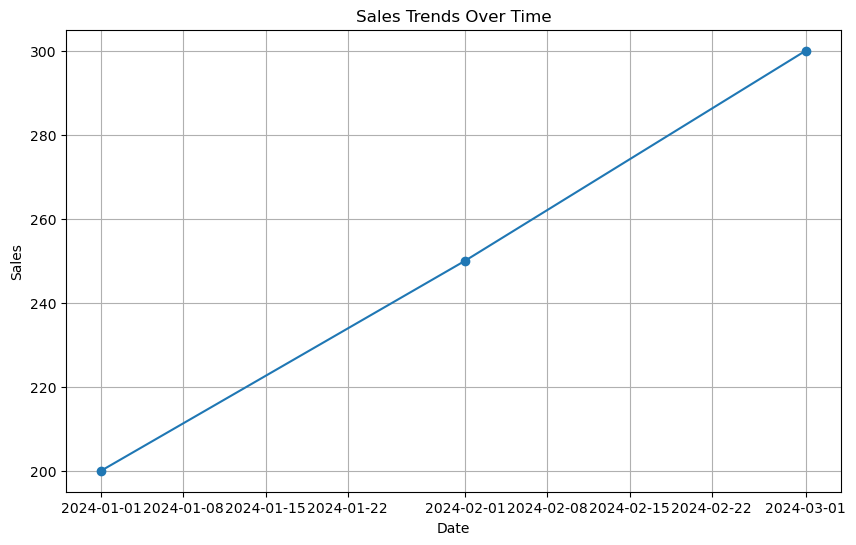

In [61]:

# Plotting sales trends over time

data = {
    'Date': ['2024-01-01', '2024-02-01', '2024-03-01'],
    'Sales': [200, 250, 300]
}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Sales'], marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


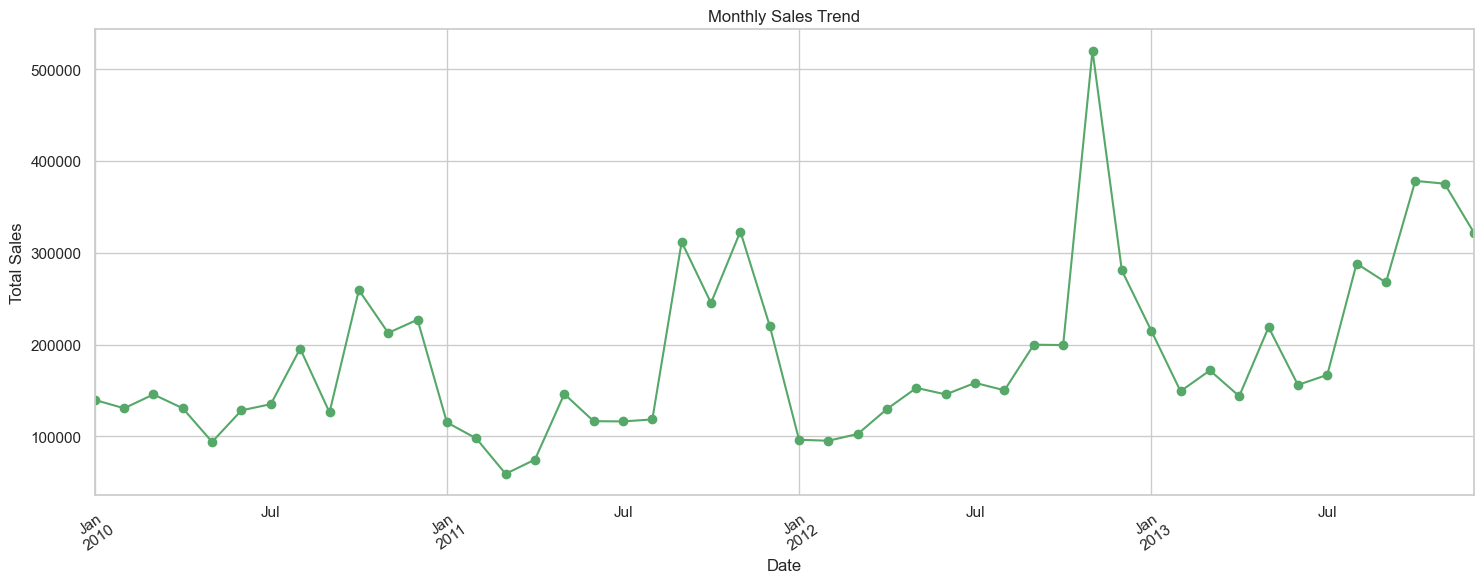

In [91]:
# Resample sales data by month

Data = 'sample-superstore-subset-excel.xlsx'
df = pd.read_excel(Data)
df['Order Date'] = pd.to_datetime(df['Order Date'])

df.set_index('Order Date', inplace=True)

monthly_sales = df['Sales'].resample('M').sum()

plt.figure(figsize=(15, 6))
monthly_sales.plot(kind='line', marker='o', linestyle='-', color='g')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation= 35)
plt.tight_layout()
plt.show()

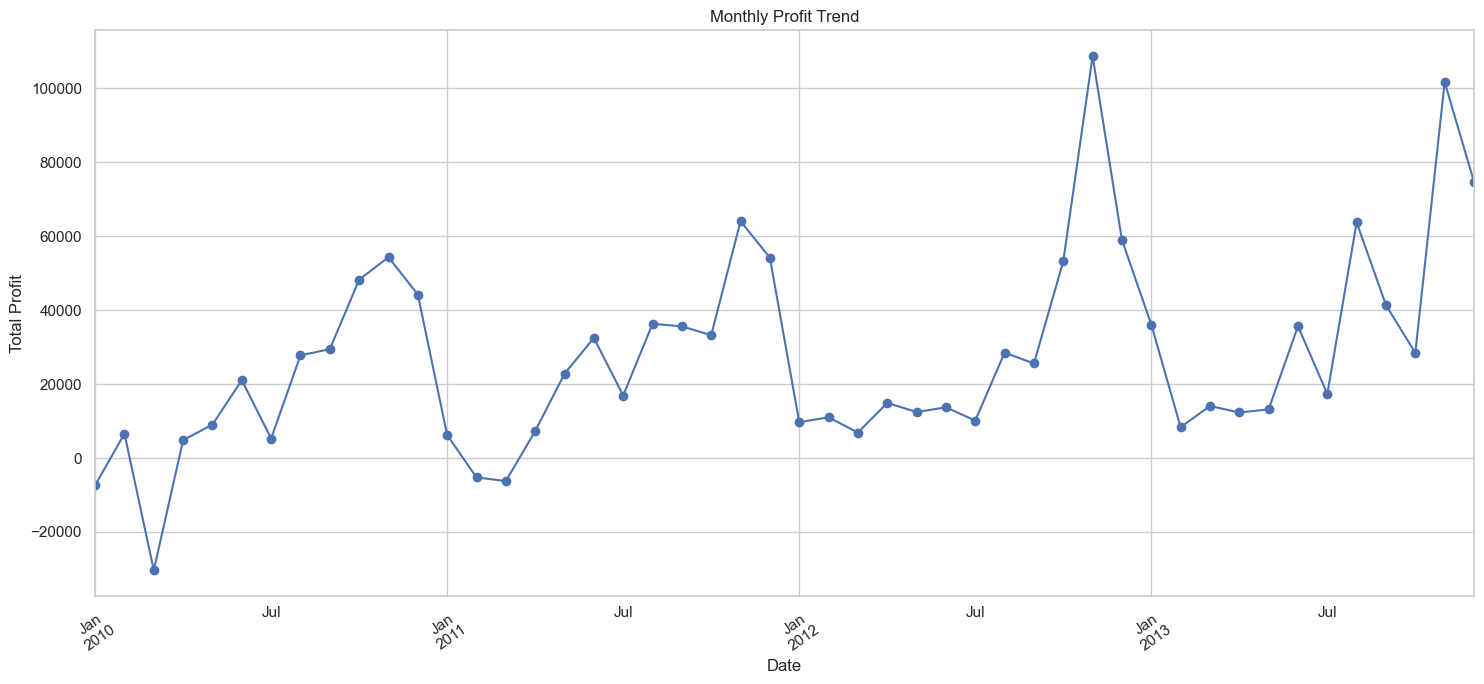

In [92]:

# Plotting profit trends over time

Data = 'sample-superstore-subset-excel.xlsx'
df = pd.read_excel(Data)

df['Order Date'] = pd.to_datetime(df['Order Date'])

df.set_index('Order Date', inplace=True)

monthly_profit = df['Profit'].resample('M').sum()

plt.figure(figsize=(15, 7))
monthly_profit.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Monthly Profit Trend')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.grid(True)
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()


In [94]:

# Identifying top-performing product categories based on total sales and profit

# Load the dataset
file_path = 'sample-superstore-subset-excel.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows to understand the structure
print(df.head())

# Display column names to ensure relevant columns are present
print("Column names in the DataFrame:")
print(df.columns)

if 'Category' in df.columns and 'Sales' in df.columns and 'Profit' in df.columns:
    sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
    profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()

sales_by_category = sales_by_category.sort_values(by='Sales', ascending=False)
profit_by_category = profit_by_category.sort_values(by='Profit', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Sales', y='Category', data=sales_by_category, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.grid(axis='x')
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x='Profit', y='Category', data=profit_by_category, palette='magma')
plt.title('Total Profit by Product Category')
plt.xlabel('Total Profit')
plt.ylabel('Product Category')
plt.grid(axis='x')
plt.show()


   Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   18606  Not Specified      0.01        2.88           0.50            2   
1   20847           High      0.01        2.84           0.93            3   
2   23086  Not Specified      0.03        6.68           6.15            3   
3   23087  Not Specified      0.01        5.68           3.60            3   
4   23088  Not Specified      0.00      205.99           2.50            3   

     Customer Name    Ship Mode Customer Segment Product Category  ...  \
0  Janice Fletcher  Regular Air        Corporate  Office Supplies  ...   
1    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
2    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
3    Bonnie Potter  Regular Air        Corporate  Office Supplies  ...   
4    Bonnie Potter  Express Air        Corporate       Technology  ...   

    Region State or Province       City  Postal Code Order Date  Ship Date  \
0  Centr

NameError: name 'sales_by_category' is not defined

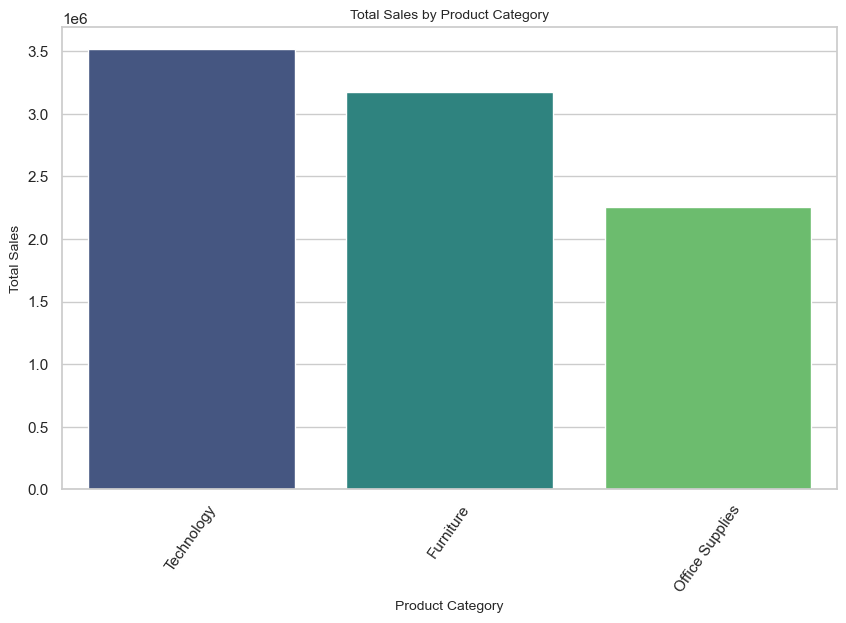

In [95]:
# Plotting total sales by product category

Data = 'sample-superstore-subset-excel.xlsx'
df = pd.read_excel(Data)
(df.columns)

df['Sales'] = pd.to_numeric(df['Sales'])

category_col = 'Product Category'  

category_sales = df.groupby(category_col)['Sales'].sum().reset_index()

category_sales = category_sales.sort_values(by='Sales', ascending=False)

sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.barplot(data=category_sales, x=category_col, y='Sales', palette='viridis')

plt.title('Total Sales by Product Category', fontsize=10)
plt.xlabel('Product Category', fontsize=10)
plt.ylabel('Total Sales', fontsize=10)
plt.xticks(rotation=55)  
plt.show()

In [96]:

# Generating summary statistics for each region

# Display summary statistics

import pandas as pd

# Load the dataset
Data = 'sample-superstore-subset-excel.xlsx'
df = pd.read_excel(Data)

# Print column names to verify
print(df.columns)

# numerical columns are numeric
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'],errors='coerce')

# Replace 'Region' with the actual column name if different
region_col = 'Region'  # Update this to the correct column name

# Group by 'Region' and calculate summary statistics
summary_statistics = df.groupby(region_col).agg({
    'Sales': ['sum', 'mean', 'median', 'std', 'min', 'max'],
    'Profit': ['sum', 'mean', 'median', 'std', 'min', 'max'],
}).reset_index()

# Rename columns for clarity
summary_statistics.columns = [' '.join(col).strip() for col in summary_statistics.columns.values]

# Display the summary statistics
(summary_statistics)

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')


,Region,Sales sum,Sales mean,Sales median,Sales std,Sales min,Sales max,Profit sum,Profit mean,Profit median,Profit std,Profit min,Profit max
0,Central,2540341.62,876.282035,203.370,2041.342685,2.24,32589.59,519825.567067,179.312027,6.1400,933.585650,-13706.4640,12504.9045
1,East,2422804.68,1058.455518,225.140,2802.669839,1.32,48418.58,377566.186045,164.948094,2.0672,885.393514,-4017.6165,9228.2256
2,South,1597346.22,817.475036,180.375,2173.877698,2.66,40136.93,104201.192420,53.327120,-3.1171,1059.835314,-16476.8380,16332.4140
3,West,2391438.80,1047.039755,204.730,3258.451329,1.62,100119.16,310849.453897,136.098710,2.7080,1119.788147,-14140.7016,8917.7187


Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')
    Region   Sales sum   Sales mean  Sales median    Sales std  Sales min  \
0  Central  2540341.62   876.282035       203.370  2041.342685       2.24   
1     East  2422804.68  1058.455518       225.140  2802.669839       1.32   
2    South  1597346.22   817.475036       180.375  2173.877698       2.66   
3     West  2391438.80  1047.039755       204.730  3258.451329       1.62   

   Sales max     Profit sum  Profit mean  Profit median   Profit std  \
0   32589.59  519825.567067   179.312027         6.1400   933.585650   
1   48418.58  377566.186045  

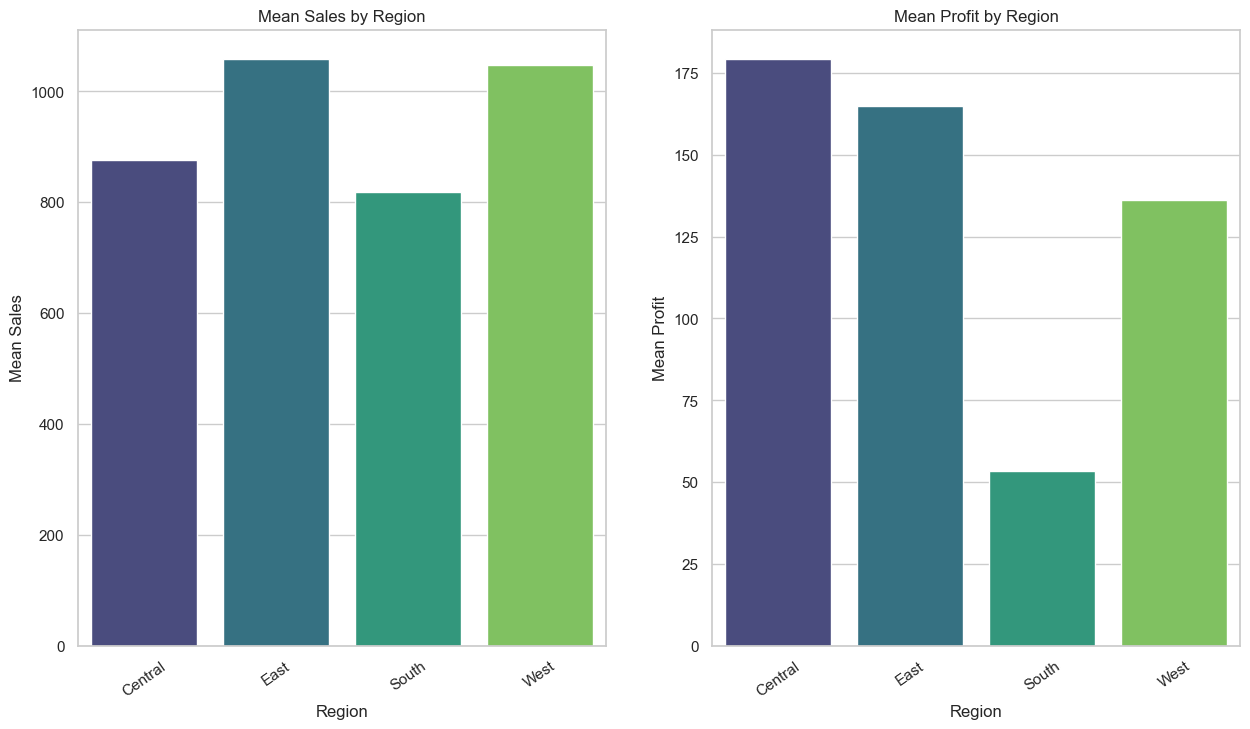

In [97]:
# Visualizing the correlation between sales and profit

Data = 'sample-superstore-subset-excel.xlsx'
df = pd.read_excel(Data)

print(df.columns)

df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

region_col = 'Region'  

grouped = df.groupby(region_col).agg({ 'Sales': ['sum', 'mean', 'median', 'std', 'min', 'max'],
    'Profit': ['sum', 'mean', 'median', 'std', 'min', 'max'],}).reset_index()

grouped.columns = [' '.join(col).strip() for col in grouped.columns.values]

print(grouped)

sns.set(style='whitegrid')
plt.figure(figsize=(15, 8))

# Mean Sales
plt.subplot(1, 2, 1)
sns.barplot(data=grouped, x=region_col, y='Sales mean', palette='viridis')
plt.title('Mean Sales by Region')
plt.xlabel('Region')
plt.ylabel('Mean Sales')
plt.xticks(rotation=35)

# Mean Profit
plt.subplot(1, 2, 2)
sns.barplot(data=grouped, x=region_col, y='Profit mean', palette='viridis')
plt.title('Mean Profit by Region')
plt.xlabel('Region')
plt.ylabel('Mean Profit')
plt.xticks(rotation=35)
plt.show()


In [98]:

# Analyzing seasonal sales trends
# Plotting seasonal sales trends

# Grouping sales data by month and year

# Plotting seasonal sales trends

Data = 'sample-superstore-subset-excel.xlsx'
df = pd.read_excel(Data)

df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

df = df.dropna(subset=['Ship Date'])

df.set_index('Ship Date', inplace=True)

monthly_sales = df['Sales'].resample('M').sum()

("Monthly Sales Data:")
(monthly_sales.head())  

Ship Date
2010-01-31    126257.81
2010-02-28    142996.24
2010-03-31    145478.01
2010-04-30    115700.23
2010-05-31    109756.88
Freq: M, Name: Sales, dtype: float64

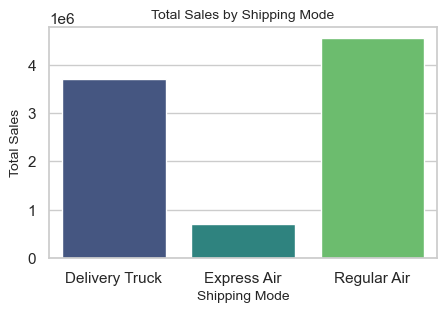

In [99]:

# Comparing sales across different ship modes

Data = 'sample-superstore-subset-excel.xlsx'
df = pd.read_excel(Data)

df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

("Column names in the DataFrame:")
(df.columns)
sales_by_mode = df.groupby('Ship Mode')['Sales'].sum().reset_index()

("Sales by Shipping Mode:")
(sales_by_mode)

sns.set(style='whitegrid')

plt.figure(figsize=(5, 3))
sns.barplot(data=sales_by_mode, x='Ship Mode', y='Sales', palette='viridis')

plt.title('Total Sales by Shipping Mode', fontsize=10)
plt.xlabel('Shipping Mode', fontsize=10)
plt.ylabel('Total Sales', fontsize=10)
plt.show()


In [100]:
# Ensure column names are clean

Data = 'sample-superstore-subset-excel.xlsx'
df = pd.read_excel(Data)

df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('-', '_')

("Cleaned Column Names: ")
(df.columns)

Index(['row_id', 'order_priority', 'discount', 'unit_price', 'shipping_cost',
       'customer_id', 'customer_name', 'ship_mode', 'customer_segment',
       'product_category', 'product_sub_category', 'product_container',
       'product_name', 'product_base_margin', 'region', 'state_or_province',
       'city', 'postal_code', 'order_date', 'ship_date', 'profit',
       'quantity_ordered_new', 'sales', 'order_id'],
      dtype='object')

In [101]:
# Print column names to verify

# Ensure 'Ship Date' column is datetime type

# Dropping rows where 'Ship Date' couldn't be converted

# Resample sales data by month

Data = 'sample-superstore-subset-excel.xlsx'
df = pd.read_excel(Data)

("Column names in the DataFrame:")
(df.columns)

df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

df = df.dropna(subset=['Ship Date'])

df.set_index('Ship Date', inplace=True)

monthly_sales = df['Sales'].resample('M').sum()

("Monthly Sales Data:")
(monthly_sales)

Ship Date
2010-01-31    126257.81
2010-02-28    142996.24
2010-03-31    145478.01
2010-04-30    115700.23
2010-05-31    109756.88
2010-06-30    120919.46
2010-07-31    130921.20
2010-08-31    204815.20
2010-09-30    113548.59
2010-10-31    271748.44
2010-11-30    209885.57
2010-12-31    213925.69
2011-01-31    126987.93
2011-02-28     87950.17
2011-03-31     65068.93
2011-04-30     75960.54
2011-05-31    144368.81
2011-06-30    120091.47
2011-07-31    121480.95
2011-08-31    117987.72
2011-09-30    285433.41
2011-10-31    260563.51
2011-11-30    326863.96
2011-12-31    195801.11
2012-01-31    125421.85
2012-02-29     97483.81
2012-03-31    103970.37
2012-04-30    116290.72
2012-05-31    162398.24
2012-06-30    142223.10
2012-07-31    162353.63
2012-08-31    142585.69
2012-09-30    202582.26
2012-10-31    181586.65
2012-11-30    532586.62
2012-12-31    284845.96
2013-01-31    207012.77
2013-02-28    127667.27
2013-03-31    200937.61
2013-04-30    146881.62
2013-05-31    211122.27
2013-0